In [1]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
text = open('doc1.txt', encoding="utf-8").read()

lower_case = text.lower()

# str.maketrans removes any punctuations 

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

tokenized_words = word_tokenize(cleaned_text, "english")

In [3]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
final_words

['good',
 'quality',
 'dog',
 'food',
 'advertised',
 'delight',
 'says',
 'cough',
 'medicine',
 'great',
 'taffy',
 'nice',
 'taffy',
 'great',
 'good',
 'expensive',
 'brands',
 'wonderful',
 'tasty',
 'taffy',
 'yay',
 'barley',
 'healthy',
 'dog',
 'food',
 'best',
 'hot',
 'sauce',
 'world',
 'cats',
 'love',
 'diet',
 'food',
 'better',
 'regular',
 'food',
 'cats',
 'fans',
 'new',
 'food',
 'fresh',
 'greasy',
 'strawberry',
 'twizzlers',
 'yummy',
 'lots',
 'twizzlers',
 'expect',
 'poor',
 'taste',
 'love']

In [5]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
import nltk
nltk.download('wordnet')
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

[nltk_data] Downloading package wordnet to C:\Users\Fahad
[nltk_data]     Ehtesham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy'] 
 

Count of each emotion 
 Counter({' happy': 1})


In [7]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")

[nltk_data] Downloading package vader_lexicon to C:\Users\Fahad
[nltk_data]     Ehtesham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

     ******Positive Sentiment*******


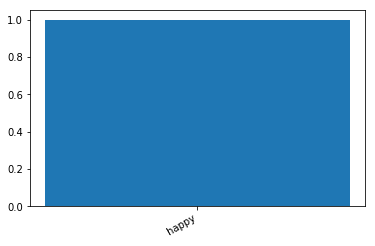

In [8]:
import nltk
nltk.download('vader_lexicon')
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()